In [10]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
# import seaborn as sns
import pandas as pd

def generate_y_vector(a, b, N):
    y = []
    for i in range(N):
        y.append(random.randint(a, b))  # [0,1]
    return y


Y = generate_y_vector(0, 1, 30)
print(Y)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0]


In [8]:
l = []

x1_red = []
x2_red = []
x1_green = []
x2_green = []
red_points = []
green_points = []

for el in Y:
    if el == 1:
        # print(np.random.uniform(2,7))
        p = []
        x1 = np.random.uniform(2, 7)
        x2 = np.random.uniform(4, 6)

        # l.append(p)
        x1_red.append(x1)
        x2_red.append(x2)
        red_points.append((x1,x2))

    else:
        
        s = np.random.choice([ np.random.uniform(0, 2), np.random.uniform(7, 9)])
        t = np.random.choice([np.random.uniform(1, 3), np.random.uniform(6, 8)])
        
        # p.append(s)
        # p.append(t)
        x1_green.append(s)
        x2_green.append(t)
        green_points.append((s,t))
        # l.append(p)

print(l)
# print("data_set : ",data_set)
# X = np.mat(l)
# print(X)

[]


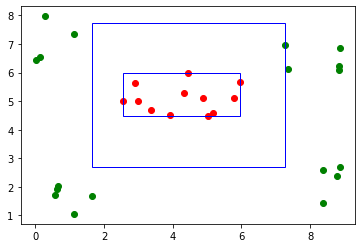

In [11]:
fig, ax = plt.subplots()
plt.scatter(x1_red,x2_red,c = 'red')
plt.scatter(x1_green,x2_green,c='green')


min_x1_red = min(x1_red)
min_x2_red = min(x2_red)
max_x1_red = max(x1_red)
max_x2_red = max(x2_red)

width = max_x1_red - min_x1_red
height = max_x2_red - min_x2_red
ax.add_patch(plt.Rectangle((min(x1_red),min(x2_red)),width,height,fc="none",ec = "blue"))

left_green = []
right_green = []

bottom_green=[]
up_green = []

for g in x1_green:
    if g < min_x1_red:
        left_green.append(g)

for g in x2_green:
    if g < min_x2_red:
        bottom_green.append(g)

for g in x1_green:
    if g > max_x1_red:
        right_green.append(g)

for g in x2_green:
    if g > max_x2_red:
        up_green.append(g)


w=min(right_green)-max(left_green)
h=min(up_green)-min(bottom_green)
# ax.add_patch(plt.Rectangle((min(xg)+0.1,min(yg)+0.1), max(xg)-0.1-(min(xg)+0.1), max(yg)-0.1-(min(yg)+0.1),edgecolor='r', facecolor="none"))
ax.add_patch(plt.Rectangle((max(left_green),max(bottom_green)),w,h,fc="none",ec = "blue"))
plt.show()
# radius = math.sqrt((width**2+height**2))/2
# ax.add_patch(plt.Circle((min_x1_red+width/2,min_x2_red+height/2),radius,fc="none",ec = "blue"))

# r = math.sqrt((w**2+h**2))/2

# ax.add_patch(plt.Circle((max(left_green)+w/2,max(bottom_green)+h/2),r,fc="none",ec = "blue"))

# df.head()
# sns.scatterplot(data=data_set, x="x1", y="x2", hue="y",style="y")

In [ ]:
# fig, ax = plt.subplots()
# plt.scatter(x1_red,x2_red,c = 'red')
# plt.scatter(x1_green,x2_green,c='green')


# # min_x1_red = min(x1_red)
# # min_x2_red = min(x2_red)
# # max_x1_red = max(x1_red)
# # max_x2_red = max(x2_red)


# # width = max_x1_red - min_x1_red
# # height = max_x2_red - min_x2_red


# radius = math.sqrt((width**2+height**2))/2
# ax.add_patch(plt.Circle((min_x1_red+width/2,min_x2_red+height/2),radius,fc="none",ec = "blue"))

# r = math.sqrt((w**2+h**2))/2

# ax.add_patch(plt.Circle((max(left_green)+w/2,max(bottom_green)+h/2),r,fc="none",ec = "blue"))

# plt.show()


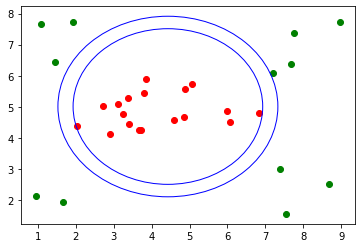

In [21]:
fig, ax = plt.subplots()
plt.scatter(x1_red,x2_red,c = 'red')
plt.scatter(x1_green,x2_green,c='green')

def eculedian_distance(x1,x2,y1,y2):
    return math.sqrt(((y2-y1)**2) + ((x2-x1)**2))


def all_red_points_covered(red_points,c_x,c_y,radius):
    all_covered = True
    for red_point in red_points:
        p = round(eculedian_distance(c_x,red_point[0],c_y,red_point[1]),2)
       
        if(p > radius):
            all_covered=False
            break
    return all_covered

def any_green_point_covered(green_points,c_x,c_y,radius):
    any_covered = False
    for green_point in green_points:
        f = round(eculedian_distance(c_x,green_point[0],c_y,green_point[1]),2)
        
        if(f < radius):
            any_covered=True
            break
    return any_covered


mean_x = (min_x1_red+max_x1_red)/2    # x-coordinate of center
mean_y = (min_x2_red+max_x2_red)/2    # y-coordinate of center
    
inner_radius = 0.2                   # initial radius
while(True):
    if(all_red_points_covered(red_points,mean_x,mean_y,inner_radius) == True):
        break
    inner_radius+=0.1
outer_radius = inner_radius

while(True):
    if(any_green_point_covered(green_points,mean_x,mean_y,outer_radius)==True):
        break
    outer_radius+=0.1
outer_radius-=0.1
center=(mean_x,mean_y)

ax.add_patch(plt.Circle(center,inner_radius,fc="none",ec = "blue"))


ax.add_patch(plt.Circle(center,outer_radius,fc="none",ec = "blue"))


In the above plots it is clearly shown that there is a significant gap is between both the hypothesis indicating that the red and green points which possess different properties and can be easily partitioned.